# Scraping IMDB's Top 250 Movies using Python



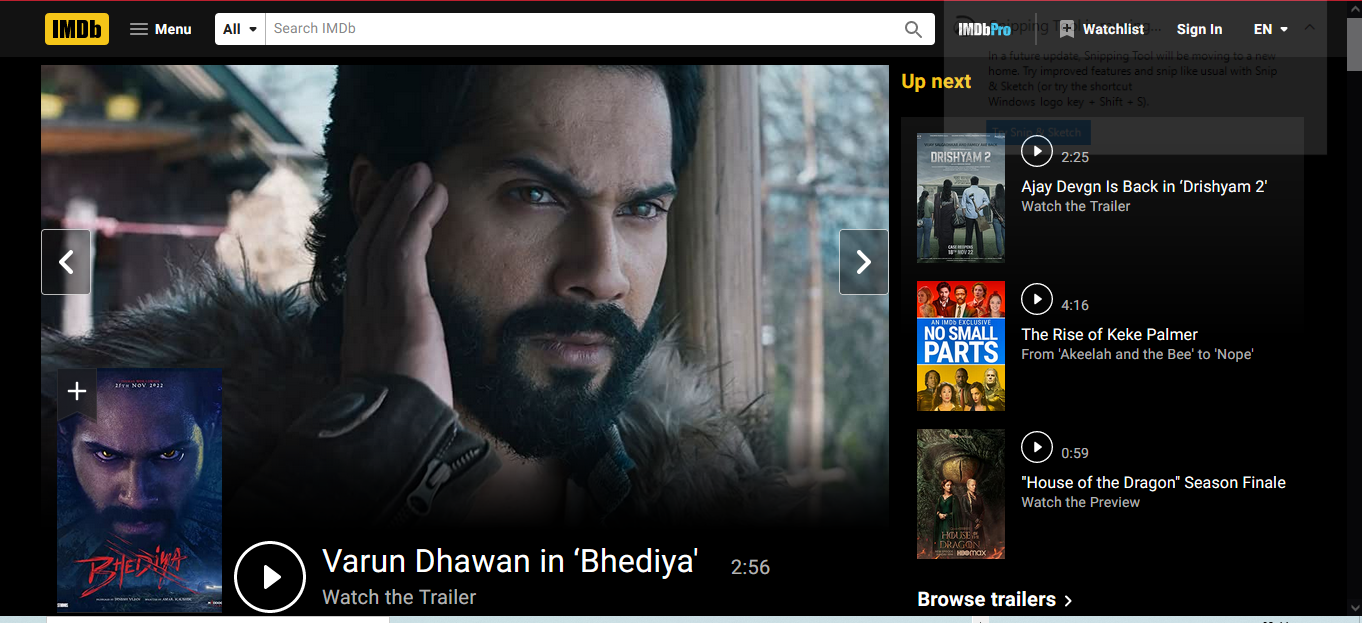

In [8]:
!pip install jovian --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 KB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [9]:
import jovian

In [10]:
# Execute this to save new versions of the notebook
jovian.commit(project="Scraping IMDB's Top 250 Movies")

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


**Why scrape data**

Web scraping is the process of collecting structured web data in an automated fashion. It is also called web data extraction. Some of the main use cases of web scraping include price monitoring, price intelligence, news monitoring, lead generation, and market research among many others.

In general, web data extraction is used by people and businesses who want to make use of the vast amount of publicly available web data to make smarter decisions.

If you have ever copied and pasted information from a website, you have performed the same function as any web scraper, only on a microscopic, manual scale. Unlike the mundane, mind-numbing process of manually extracting data, web scraping uses intelligent automation to retrieve hundreds, millions, or even billions of data points from the seemingly endless frontier of the internet.



**What is data scraping good for?**

Web data extraction – also widely known as data scraping – has a huge range of applications. A data scraping tool can help you automate the process of extracting information from other websites, quickly and accurately. It can also make sure the data you’ve extracted is neatly organized, making it easier to analyze and use for other projects.

In the world of e-commerce, web data scraping is widely used for competitor price monitoring. It’s the only practical way for brands to check the pricing of their competitors’ products and services, allowing them to fine-tune their own price strategies and stay ahead of the game. It’s also used as a tool for manufacturers to ensure retailers are compliant with pricing guidelines for their products. Market research organizations and analysts depend on web data extraction to gauge consumer sentiment by keeping track of online product reviews, news articles, and feedback.

There’s a vast array of applications for data extraction in the financial world. Data scraping tools are used to extract insight from news stories, using this information to guide investment strategies. Similarly, researchers and analysts depend on data extraction to assess the financial health of companies. Insurance and financial services companies can mine a rich seam of alternative data scraped from the web to design new products and policies for their customers.

Applications for web data extraction don’t end there. Data scraping tools are widely used in news and reputation monitoring, journalism, SEO monitoring, competitor analysis, data-driven marketing and lead generation, risk management, real estate, academic research, and much more.

**How does scraping work?**

To understand web scraping, it is important to first understand that web pages are built with text-based mark-up languages – the most common being HTML.

A mark-up language defines the structure of a website’s content. Since there are universal components and tags of mark-up languages, this makes it much easier for web scrapers to pull all the information that it needs. Once the HTML is parsed, the scraper then extracts the necessary data and stores it. Note : Not all websites allow Web Scraping, especially when personal information of the users is involved, so we should always ensure that we do not explore too much, and don't get our hands on information which might belong to someone else. Websites generally have protections at place, and they would block our access to the website if they see us scraping a large amount of data from their website.


![](https://i.imgur.com/gFfWD9r.png)

![](https://i.imgur.com/SvZi4Qi.jpeg)

In [11]:
jovian.commit(project="Scraping IMDB's Top 250 Movies")

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Introduction

**Project Idea**:  In this project, we will parse through the IMDB's Top rated Movies page to get details about the top rated movies from around the world.

We will retrieve information from the page ’Top Rated Movies’ using web scraping: a process of extracting information from a website programmatically. Web scraping isn’t magic, and yet some readers may grab information on a daily basis. For example, a recent graduate may copy and paste information about companies they applied for into a spreadsheet for job application management.


**Project Goal :** The project goal is to build a web scraper that will extract all the desirable information and assemble those into a single CSV.

**Project steps**

Below is an outline of the steps we'll follow to achieve the above mentioned goal:

 - Downloading the webpage

 - Parsing the HTML source code 

 - Extracting the relevant movie details from the home page
  
 - Creating a dataframe using the details from the above step. 

 - Extracting the relevant movie details from all the pages of the 250 
   movies.
    
 - Creating a dataframe using the details from the above step.

 - Creating a CSV file using the dataframes created above.

 - Future work and References



Note : We will use the Jovian library and its commit() function throughout the code to save our progress as we move along this project.

In [12]:
jovian.commit(project="Scraping IMDB's Top 250 Movies")

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [13]:
!pip install requests --quiet --upgrade
import requests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.3 MB/s eta 0:00:00


## Step1: Downloading the web page 

In order to download a web page, we use requests.get() to send the HTTP request to the IMDB server and what the function returns is a response object, which is the HTTP response.

In [14]:
home_url = 'https://www.imdb.com/chart/top'      #The URL Address of the webpage we will s
response = requests.get(home_url)   

## Step 2: Parsing HTML source code 




Now, we have to check if we succesfully send the HTTP request and get a HTTP response back on purpose. This is because we're NOT using browsers, because of which we can't get the feedback directly if we didn't send HTTP requests successfully.

In general, the method to check out if the server sended a HTTP response back is the status code. In requests library, requests.get returns a response object, which containing the page contents and the information about status code indicating if the HTTP request was successful. Learn more about HTTP status codes here: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status.

If the request was successful, response.status_code is set to a value between 200 and 299.

In [15]:
response.status_code   #Here we are checking the Status code, -> 200-299 will mean that the request was successful



200

The HTTP response contains HTML that is ready to be displayed in browser. Here we can use response.text to retrive the HTML document.

In [16]:
page_contents = response.text
len(page_contents) 

593017

As we can see, This page has more than 5 Lac characters.

In [17]:
page_contents[:1000]

'\n\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n\n    \n    \n    \n\n    \n    \n    \n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Top 250 Movies - IMDb</title>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>\n<script>\n    if (typeof uet == \'function\') {\n      uet("be", "LoadTitle", {wb: 1});\n    }\n</script>\n<script>\n    if (typeof uex == \'function\') {\n      uex("ld", "LoadTitle", {wb: 1});\n    }\n</script>\n\n        <link rel="canonical" href="https://www.imd

Below we will write our page contents to a new file

In [18]:
with open('top_rated_movies.html', 'w') as f:  #Writing the html page to a file locally, i.e. a replica of real html page
    f.write(page_contents)

### Creating the BeautifulSoup object

In [19]:
!pip install beautifulsoup4 --quiet --upgrade
from bs4 import BeautifulSoup
doc = BeautifulSoup(page_contents, 'html.parser')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 3.1 MB/s eta 0:00:00


In [20]:
type(doc)

bs4.BeautifulSoup

 **Helper function to create the BeautifulSoup object**

The helper function to create the BeautifulSoup object will take a form as below

In [21]:
def create_html_doc(url):
    
    #download page using request library.
    response = requests.get(url)
    #determine whether the webpage was successfully downloaded.
    if response.status_code != 200:
        return "The page was not downloaded successfully"
    page_contents = response.text
    
    #convert contents into a BeautifulSoup object.
    doc = BeautifulSoup(page_contents)
    return doc

In [22]:
type(doc)

bs4.BeautifulSoup

In [23]:
new_doc_test = create_html_doc(home_url)
new_doc_test

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Top 250 Movies - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/chart/top" rel="canonical"/>
<meta content="http://www.imdb.com/chart/top" property="og:url"/>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadI

In [24]:
jovian.commit(project="Scraping IMDB's Top 250 Movies")

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Step 3 : Extracting the relevant movie details from the home page

Our examination of the html page structure showed that the relevant data are within the 'td tags'.So now, we will try to extract all the relevant td tages as below

![](https://i.imgur.com/6zqk987.png)

In [25]:
All_td_tags = doc.find_all('td', {'class' : 'titleColumn'})
All_td_tags 

[<td class="titleColumn">
       1.
       <a href="/title/tt0111161/" title="Frank Darabont (dir.), Tim Robbins, Morgan Freeman">The Shawshank Redemption</a>
 <span class="secondaryInfo">(1994)</span>
 </td>, <td class="titleColumn">
       2.
       <a href="/title/tt0068646/" title="Francis Ford Coppola (dir.), Marlon Brando, Al Pacino">The Godfather</a>
 <span class="secondaryInfo">(1972)</span>
 </td>, <td class="titleColumn">
       3.
       <a href="/title/tt0468569/" title="Christopher Nolan (dir.), Christian Bale, Heath Ledger">The Dark Knight</a>
 <span class="secondaryInfo">(2008)</span>
 </td>, <td class="titleColumn">
       4.
       <a href="/title/tt0071562/" title="Francis Ford Coppola (dir.), Al Pacino, Robert De Niro">The Godfather Part II</a>
 <span class="secondaryInfo">(1974)</span>
 </td>, <td class="titleColumn">
       5.
       <a href="/title/tt0050083/" title="Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb">12 Angry Men</a>
 <span class="secondaryInfo">(1957

In [26]:
jovian.commit(project="Scraping IMDB's Top 250 Movies")

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [27]:
len(All_td_tags)

250

In [28]:
jovian.commit(project="Scraping IMDB's Top 250 Movies")

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


**Movie Names**

In [29]:
All_td_tags = doc.find_all('td', {'class' : 'titleColumn'})#HERE we create a list of MOVIE NAMES from MOST POPULAR MOVIES
movie_names = []
for item in All_td_tags:
    movie_names.append(item.find('a').text)
movie_names[:3]

['The Shawshank Redemption', 'The Godfather', 'The Dark Knight']

In [30]:
len(movie_names)

250

**Helper function to extract the movie names**

In [31]:
def get_movie_names(All_td_tags):
    movie_names = []
    for item in All_td_tags:
        movie_names.append(item.find('a').text)
       
    
    return movie_names
   

In [32]:
movie_names = get_movie_names(All_td_tags)
movie_names[:3]

['The Shawshank Redemption', 'The Godfather', 'The Dark Knight']

In [33]:
len(movie_names)

250

**Movie URLs**

In [34]:
movie_urls = []             #HERE we create a list of MOVIE URLs from MOST POPULAR MOVIES 
base_url = 'https://www.imdb.com/'
for item in All_td_tags:
    a = item.find('a')
    movie_urls.append(base_url + item.find('a')['href'])
movie_urls[:3]

['https://www.imdb.com//title/tt0111161/',
 'https://www.imdb.com//title/tt0068646/',
 'https://www.imdb.com//title/tt0468569/']

In [35]:
len(movie_urls)

250

**Helper function to extract the movie urls**


In [36]:
def get_movie_urls(All_td_tags):
    
    movie_urls = []
    base_url = 'https://www.imdb.com/'
    for item in All_td_tags:
        a = item.find('a')
        movie_urls.append(base_url + item.find('a')['href'])
    
    
    
    return movie_urls


In [37]:
movie_urls = get_movie_urls(All_td_tags)
movie_urls[:3]

['https://www.imdb.com//title/tt0111161/',
 'https://www.imdb.com//title/tt0068646/',
 'https://www.imdb.com//title/tt0468569/']

In [38]:
movie_urls[:10]

['https://www.imdb.com//title/tt0111161/',
 'https://www.imdb.com//title/tt0068646/',
 'https://www.imdb.com//title/tt0468569/',
 'https://www.imdb.com//title/tt0071562/',
 'https://www.imdb.com//title/tt0050083/',
 'https://www.imdb.com//title/tt0108052/',
 'https://www.imdb.com//title/tt0167260/',
 'https://www.imdb.com//title/tt0110912/',
 'https://www.imdb.com//title/tt0120737/',
 'https://www.imdb.com//title/tt0060196/']

In [39]:
len(movie_urls)

250

**Year of Release**

In [40]:
movie_release_years = []       #HERE we create a list of MOVIE YEARs from MOST POPULAR MOVIES 
for item in All_td_tags:
        movie_release_years.append(item.find('span',{'class' :'secondaryInfo'}).text[1:5])
movie_release_years[:3]

['1994', '1972', '2008']

In [41]:
movie_release_years[:5]

['1994', '1972', '2008', '1974', '1957']

In [42]:
len(movie_release_years)

250

**Helper function to extract the movie release years**

In [43]:
def get_movie_release_years(All_td_tags):
    movie_release_years = []
    for item in All_td_tags:
        movie_release_years.append(item.find('span',{'class' :'secondaryInfo'}).text[1:5])
        
    
    return movie_release_years

In [44]:
movie_release_years = get_movie_release_years(All_td_tags)
movie_release_years[:3]

['1994', '1972', '2008']

In [45]:
movie_release_years[:5]

['1994', '1972', '2008', '1974', '1957']

In [46]:
len(movie_release_years)

250

Now, let's write a function to integrate the above codes and the details fetched by the same

In [47]:
def movie_details(url):
    #download page using requests library and create BeautifulSoup object.
    
    doc = create_html_doc(url)
    
    # Extract the relevant tag.
    
    All_td_tags = doc.find_all('td', {'class' : 'titleColumn'})  
    
     

    movie_names = get_movie_names(All_td_tags)

    movie_urls = get_movie_urls(All_td_tags)

    movie_release_years = get_movie_release_years(All_td_tags)

    return movie_names, movie_urls, movie_release_years 
    


In [48]:
final_details_1 = movie_details(home_url)
final_details_1

(['The Shawshank Redemption',
  'The Godfather',
  'The Dark Knight',
  'The Godfather Part II',
  '12 Angry Men',
  "Schindler's List",
  'The Lord of the Rings: The Return of the King',
  'Pulp Fiction',
  'The Lord of the Rings: The Fellowship of the Ring',
  'The Good, the Bad and the Ugly',
  'Forrest Gump',
  'Fight Club',
  'The Lord of the Rings: The Two Towers',
  'Inception',
  'Star Wars: Episode V - The Empire Strikes Back',
  'The Matrix',
  'Goodfellas',
  "One Flew Over the Cuckoo's Nest",
  'Se7en',
  'Seven Samurai',
  "It's a Wonderful Life",
  'The Silence of the Lambs',
  'Saving Private Ryan',
  'City of God',
  'Interstellar',
  'Life Is Beautiful',
  'The Green Mile',
  'Star Wars',
  'Terminator 2: Judgment Day',
  'Back to the Future',
  'Spirited Away',
  'The Pianist',
  'Psycho',
  'Parasite',
  'Léon: The Professional',
  'The Lion King',
  'Gladiator',
  'American History X',
  'The Departed',
  'The Usual Suspects',
  'The Prestige',
  'Whiplash',
  'Casa

In [49]:
len(final_details_1)

3

## Step 4 : Creating a dataframe using the details from the above step.

**To create a data frame using the data derived in the steps above in the form of lists**


**What is Pandas?**

Pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

**What is a DataFrame?**

A Pandas DataFrame is a 2 dimensional data structure, like a 2 dimensional array, or a table with rows and columns. DataFrame makes it easier for us to work with tablular data and analse it.

**Creating a DataFrame using Pandas for Lists derived till now**

Now that we have the information for all the movies, Let us convert this dictionary to a DataFrame just like we did previously to easily work with the tabular data using Pandas.

In [50]:
!pip install pandas --quiet --upgrade   #Installing Pandas Library
import pandas as pd

Now, we can create a "Python Dictionary" using the "Movie Names" and "Movie URLs" that we have extracted above.



In [51]:
movies_dict_1 = {
    
     'Movie Names' : movie_names,
     'Movie URLs' : movie_urls,
     'Year_of_Release' : movie_release_years 
}

Let us now convert the dictionary we created above into a data frame

In [52]:
movies_df_1 = pd.DataFrame(movies_dict_1) 

In [53]:
len(movies_df_1)

250

In [54]:
movies_df_1

,Movie Names,Movie URLs,Year_of_Release
0,The Shawshank Redemption,https://www.imdb.com//title/tt0111161/,1994
1,The Godfather,https://www.imdb.com//title/tt0068646/,1972
2,The Dark Knight,https://www.imdb.com//title/tt0468569/,2008
3,The Godfather Part II,https://www.imdb.com//title/tt0071562/,1974
4,12 Angry Men,https://www.imdb.com//title/tt0050083/,1957
...,...,...,...
245,Dersu Uzala,https://www.imdb.com//title/tt0071411/,1975
246,The Help,https://www.imdb.com//title/tt1454029/,2011
247,Aladdin,https://www.imdb.com//title/tt0103639/,1992
248,Gandhi,https://www.imdb.com//title/tt0083987/,1982


## Step 5 : Extracting the relevant movie details from all the pages of the 250 movies.

**Now, we will extract the details from each page using the BeautifulSoup object**

Now, we will go into each individual Movie's page and extract the rest of the required details.

So, in order to extract some more details, we will get into the page of a movie.To start with, we will try to extract those details from the page of the movie which is 'The Shawshank Redemption'. This has been explained in the steps further.

In order to do that, we will use BeautifulSoup and create a BeautifulSoup object to extract the required info from the page.

**Downloading the webpage for the movie 'The Shawshank Redemtion'**

Let's download the web page of the movie 'The Godfather' in order to extract the relevant details for the movie in the steps further.

In [55]:
page_url = 'https://www.imdb.com//title/tt0111161/'


**Creating the BeautifulSoup object of a movie page**


In [56]:
doc2=create_html_doc(page_url)
doc2

'The page was not downloaded successfully'

In [57]:
len(doc2)

40

In [58]:
type(doc2)

str

**Director Name**

The director name is present within the 'a' tag as shown in the image below

![](https://i.imgur.com/lPfy1wG.png)


In [59]:
director = doc2.find('a',{'class':"ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link"}).get_text(strip=True)
director

TypeError: ignored

**Helper function to extract the director name**

In [ ]:
def get_director_name(soup):
    director = soup.find('a',{'class':"ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link"}).get_text(strip=True)
    return director   
    

In [ ]:
movie_director_name = get_director_name(doc2)
movie_director_name

**Movie Rating**

The movie rating is present within the 'div' tag as shown in the image below

![](https://i.imgur.com/kktNzOk.png)

In [ ]:
rating  = doc2.find('div',{'class':'sc-7ab21ed2-0 fAePGh'}).text[:3]
rating 

**Helper function to extract the movie rating**

> 



In [ ]:
def get_movie_rating(soup):
    movie_rating  = soup.find('div',{'class':'sc-7ab21ed2-0 fAePGh'}).text[:3]
    return movie_rating

In [ ]:
movie_rating = get_movie_rating(doc2)
movie_rating

**User Reviews**

The user reviews are present within the 'span' tag as shown in the image below

![](https://i.imgur.com/YHJQLud.png)

In [ ]:
user_reviews = doc2.find('span',{'class':'score'}).text
user_reviews


**Helper function to extract the user review**

In [ ]:
def get_user_reviews(soup):
    user_reviews=soup.find('span',{'class':'score'}).text 
    return user_reviews
    
    

In [ ]:
movie_user_reviews = get_user_reviews(doc2)
movie_user_reviews

In [ ]:
jovian.commit(project="Scraping IMDB's Top 250 Movies")

**Getting all the above functions together**

In [ ]:
def get_movie_page_details(u):
    
        doc2=create_html_doc(u)
        movie_Director = get_director_name(doc2)
        movie_Rating  = get_movie_rating(doc2)
        movie_User_Reviews = get_user_reviews(doc2)
        
        return movie_Director,movie_Rating,movie_User_Reviews



In [ ]:
Specific_movie_details = get_movie_page_details(page_url)
Specific_movie_details

**Scraping all 250 pages for more details related to the 250 top rated movies on the IMDB**

In the steps below, we will extract more relevant details from the pages of the 250 top rated movies on this site.

**Looping over the movie_urls to extract the details of all the pages of the 250 movies**

The next steps will include obtaining the details of all the pages of the 250 movies.This can be done by looping over the urls of the 250 movies.These steps have been further elaborated below.

In [ ]:
movie_urls

In [ ]:
len(movie_urls)

In [ ]:
jovian.commit(project="Scraping IMDB's Top 250 Movies")

**Getting the above details under one function**

Now, we will extract the details of all the 250 pages using the helper functions created above and the 'movie_urls'

In [ ]:
def TOTAL_MOVIE_DETAILS(movie_urls):

 
    Director_Names =[]
    Ratings =[]
    User_Reviews = []
    for url in movie_urls:
         doc3= create_html_doc(url)  
         Director_Names.append(get_director_name(doc3)) 
         Ratings.append(get_movie_rating(doc3))
         User_Reviews.append(get_user_reviews(doc3))
    #return Director_Names,Ratings,User_Reviews 
             
         #for i in range(len(Director_Names)):

             #movie_details['Movie_director_names'].append(Director_Names[i])
             #movie_details['Movie_ratings'].append(Ratings[i])
   	         #movie_details['Movie_user_reviews'].append(User_Reviews[i])
    return      {
                        'Movie_director_names':Director_Names,
 			                  'Movie_ratings':Ratings,
			                  'Movie_user_reviews':User_Reviews

		            }
    

  # return Movie_director_names,Movie_ratings,Movie_user_reviews
   

In [ ]:
movies_dict_2 = TOTAL_MOVIE_DETAILS(movie_urls)
movies_dict_2

## Step 6 : Creating a dataframe using the dictionary above 'movies_dict_2'

In [ ]:
movies_df_2 = pd.DataFrame(movies_dict_2) 

In [ ]:
len(movies_df_2)

**Saving the 2 data frames above in df1 and df2**

In [ ]:
df1 = movies_df_1
df2 = movies_df_2

**Concatenating both the data frames above**

In [ ]:
final_df = pd.concat([df1,df2], axis = 1) 
final_df

In [ ]:
jovian.commit(project="Scraping IMDB's Top 250 Movies")

## Step 7 : Creating a CSV file using the final data frame above

In [ ]:
final_df.to_csv('top_rated_movies.csv', index=None)

In [ ]:
jovian.commit(project="Scraping IMDB's Top 250 Movies")

**Summary**

Finally, we have managed to parse 'IMDB - Top Rated Movies' to get our hands on some useful details. We have saved all the information we could extract from that website for our needs in a CSV file using which we can further get an insight to some relevant details

Let us look at the steps that we took from start to finish:

- We downloaded the webpage using requests

- We parsed the HTML source code using BeautifulSoup library and extracted the desired 
  information, i.e.

- The names of 'Top Rated Movies, urls of each of those movies,release years for the movies.

- We then created a Python Dictionary to save all these details.

- We converted the python dictionary into Pandas DataFrames

- We at last converted the same DataFrame into a CSV file, which was the goal of our project.

## Step 8 : Future Work and References

**Future Work**

- We can now work forward to explore this data more and more to fetch meaningful information out 
  of it.

- With all the insights, and further analysis into the data, we can have answers to some 
  relevant questions like -

- What are the summaries of the top-rated movies? What are the meta scores of the top rated 
  movies?

**References**

1. IMDB Website. https://www.imdb.com/chart/top

2. Beautiful Soup documentation. https://www.crummy.com/software/BeautifulSoup/bs4/doc/

3. https://jovian.ai/aakashns/python-web-scraping-and-rest-api

4. https://www.geeksforgeeks.org/python-web-scraping-tutorial/

5. https://www.tutorialspoint.com/python_web_scraping/index.htm

6. https://realpython.com/python-web-scraping-practical-introduction/

7. https://www.w3schools.com/python/

8. https://www.youtube.com/

In [ ]:
jovian.commit(project="Scraping IMDB's Top 250 Movies")